<a href="https://colab.research.google.com/github/AriFatih/ML-Assignments/blob/main/DL_Assignment_2_(Image_Classification_with_CNN)_Fatih_ari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [4]:
# Checking the shape of one image
x_train[100].shape

(28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train[100]

8

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
y_train.shape

(60000,)

In [9]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [10]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

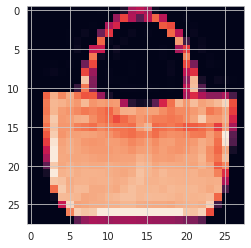

In [11]:
plt.imshow(x_train[100])
# plt.matshow(x_train[100])

In [12]:
y_train[100]

8

In [13]:
classes[y_train[100]]

'Bag'

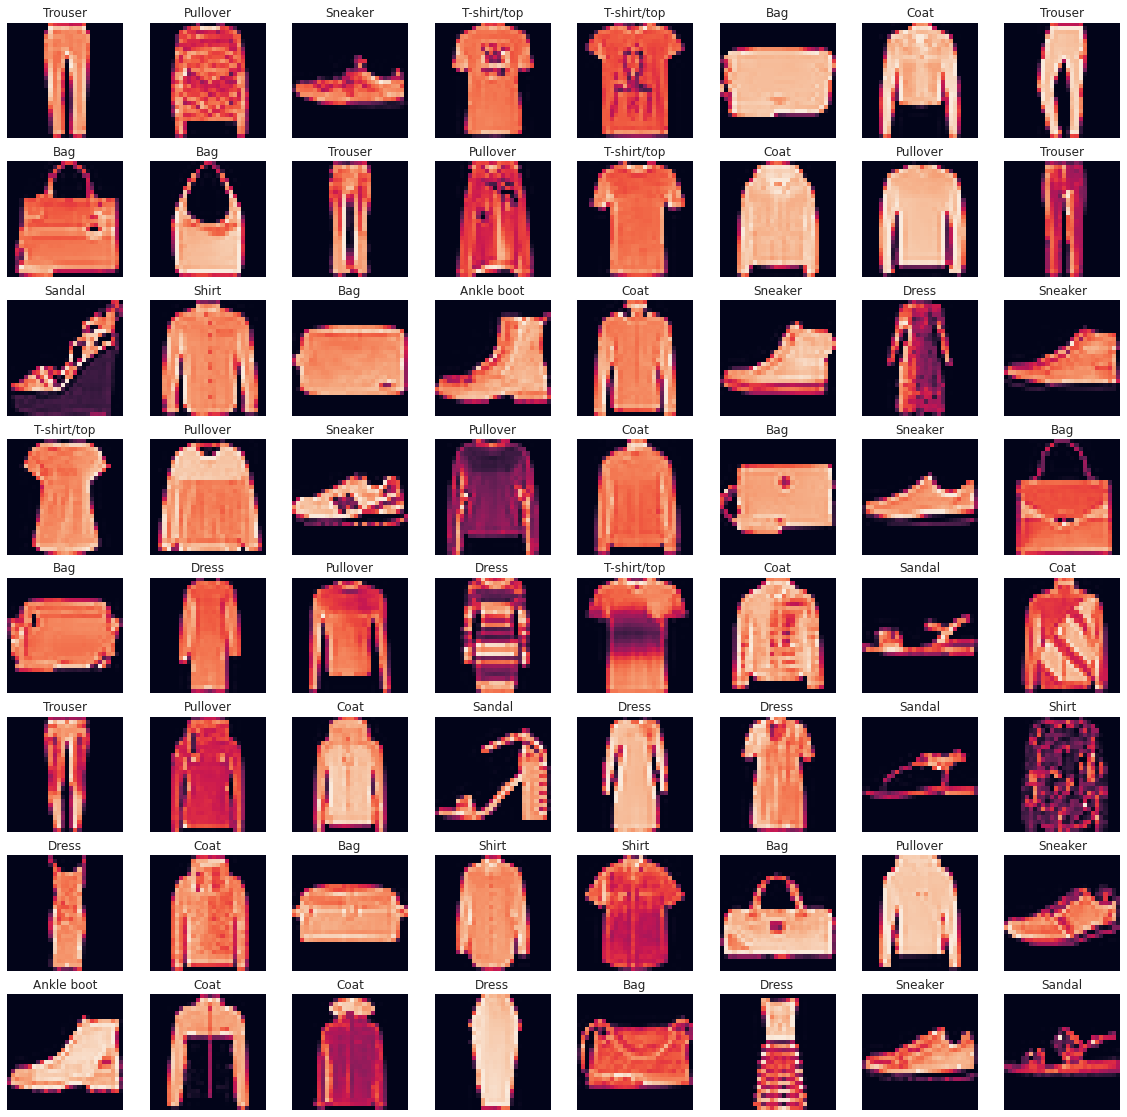

In [14]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(x_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [15]:
x_train[100].min()

0

In [16]:
x_train[100].max()

255

In [17]:
# Normalize image pixels

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [18]:
x_train[100].min()

0.0

In [19]:
x_train[100].max()

1.0

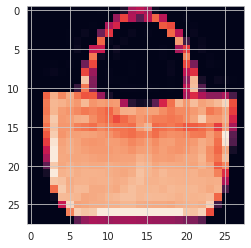

In [20]:
plt.imshow(x_train[100])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [21]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [22]:
x_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [23]:
X_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [24]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [25]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [26]:
y_train.shape

(60000,)

In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [29]:
y_train[100]

8

In [30]:
Y_train[100]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [32]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 20412)             0         
                                                                 
 dense (Dense)               (None, 128)               2612864   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,614,434
Trainable params: 2,614,434
Non-trainable params: 0
______________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)

In [36]:
model.fit(X_train, Y_train, batch_size=16, epochs=40, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/40
3750/3750 [==============================] - 25s 4ms/step - loss: 0.3593 - accuracy: 0.8745 - val_loss: 0.3189 - val_accuracy: 0.8857
Epoch 2/40
3750/3750 [==============================] - 14s 4ms/step - loss: 0.2651 - accuracy: 0.9078 - val_loss: 0.3006 - val_accuracy: 0.8972
Epoch 3/40
3750/3750 [==============================] - 14s 4ms/step - loss: 0.2453 - accuracy: 0.9164 - val_loss: 0.2849 - val_accuracy: 0.9024
Epoch 4/40
3750/3750 [==============================] - 14s 4ms/step - loss: 0.2349 - accuracy: 0.9204 - val_loss: 0.3220 - val_accuracy: 0.9022
Epoch 5/40
3750/3750 [==============================] - 15s 4ms/step - loss: 0.2255 - accuracy: 0.9247 - val_loss: 0.2957 - val_accuracy: 0.9001
Epoch 6/40
3750/3750 [==============================] - 18s 5ms/step - loss: 0.2169 - accuracy: 0.9274 - val_loss: 0.3555 - val_accuracy: 0.8961
Epoch 7/40
3750/3750 [==============================] - 14s 4ms/step - loss: 0.2161 - accuracy: 0.9279 - val_loss: 0.3179 - val_ac

**TASK 7: Plot values of metrics you used in your model.**

In [37]:
model.metrics_names

['loss', 'accuracy']

In [38]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.359,0.874,0.319,0.886
1,0.265,0.908,0.301,0.897
2,0.245,0.916,0.285,0.902
3,0.235,0.920,0.322,0.902
4,0.225,0.925,0.296,0.900


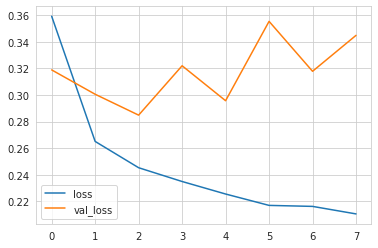

In [39]:
summary[["loss", "val_loss"]].plot();

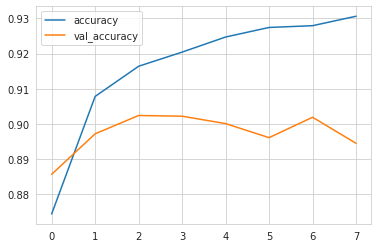

In [40]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2849 - accuracy: 0.9024


[0.2848634421825409, 0.902400016784668]

In [43]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2848634421825409
Test accuracy: 0.902400016784668


In [44]:
pred_prob = model.predict(X_test)

In [45]:
y_pred = np.argmax(pred_prob, axis=1)

In [46]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1000
           1       1.00      0.97      0.98      1000
           2       0.87      0.82      0.84      1000
           3       0.88      0.93      0.90      1000
           4       0.81      0.89      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.71      0.72      0.71      1000
           7       0.95      0.98      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



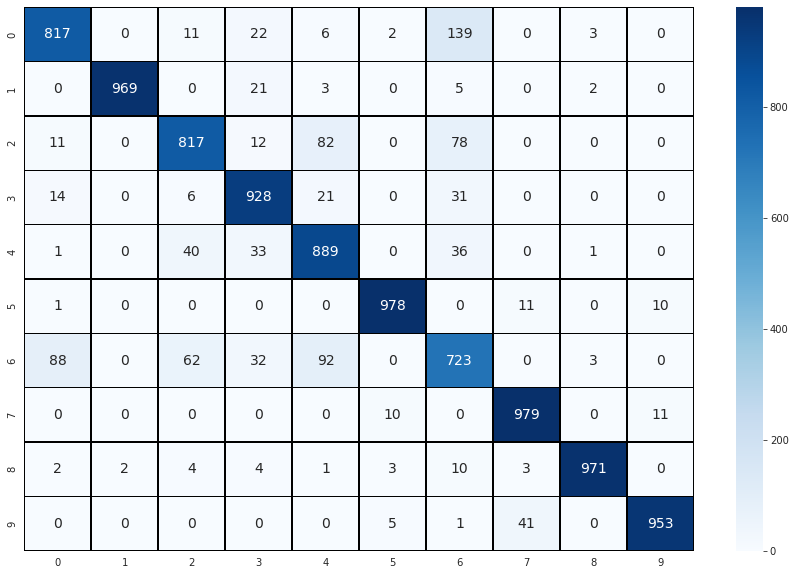

In [48]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

## Prediction

In [49]:
my_image = X_test[200]


In [50]:
my_image.shape

(28, 28, 1)

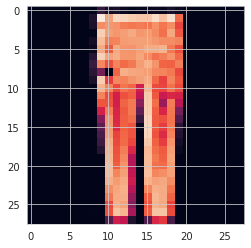

In [51]:
plt.imshow(my_image.reshape(28,28));

In [52]:
pred_prob = model.predict(my_image.reshape(1,28,28,1))
pred_prob

array([[2.8079891e-04, 9.9822861e-01, 1.6472545e-06, 1.1754655e-03,
        2.4389298e-04, 4.5373842e-08, 6.4048829e-05, 1.7727395e-07,
        5.1758152e-06, 6.8707124e-08]], dtype=float32)

In [53]:
# SHAPE --> (num_images,width,height,color_channels)
y_pred = np.argmax(pred_prob)
y_pred

1

In [54]:
classes[1]

'Trouser'

In [55]:
model.save("cnn-assignment.h5")

In [59]:
model=tf.keras.models.load_model('cnn-assignment.h5')

In [60]:
X_test[50].shape

(28, 28, 1)

In [65]:
pred=model.predict(np.expand_dims(X_test[50],axis=0))

In [62]:
np.argmax(pred)

4

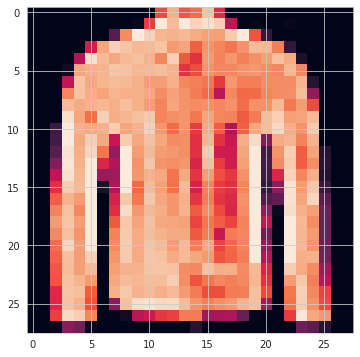

In [67]:
plt.imshow(X_test[50].reshape(28,28))

In [68]:
classes[4]

'Coat'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___